In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import exp

In [26]:
# load data
crime = pd.read_csv("crime.csv")
crime

,County,Year,Population,Index Count,Index Rate,Violent Count,Violent Rate,Property Count,Property Rate,Firearm Count,Firearm Rate
0,Albany,2015,308613,8224,2664.8,1005,325.7,7219,2339.2,111,36.0
1,Albany,2014,308166,9157,2971.5,995,322.9,8162,2648.6,146,47.4
2,Albany,2013,306300,9455,3086.8,1002,327.1,8453,2759.7,150,49.0
3,Albany,2012,305204,9971,3267.0,1012,331.6,8959,2935.4,137,44.9
4,Albany,2011,305571,10725,3509.8,1163,380.6,9562,3129.2,196,64.1
5,Albany,2010,295267,11036,3737.6,1182,400.3,9854,3337.3,154,52.2
6,Albany,2009,298400,10613,3556.6,1289,432.0,9324,3124.7,191,64.0
7,Albany,2008,299789,10750,3585.9,1356,452.3,9394,3133.5,238,79.4
8,Albany,2007,297154,10584,3561.8,1468,494.0,9116,3067.8,208,70.0
9,Albany,2006,298210,11935,4002.2,1545,518.1,10390,3484.1,200,67.1


In [27]:
# clean data
counties = set(crime["County"])
reporting_counties = []
nonreporting_counties = []

for county in counties:
    if len(crime[crime["County"]==county]["County"]) == 26:
        reporting_counties.append(county)
    else:
        nonreporting_counties.append(county)
for i,county in enumerate(nonreporting_counties):
    crime = crime[crime.County != county]

In [28]:
# just Tompkins county
tompkins = crime[crime["County"]=="Tompkins"]
tompkins = tompkins.sort_values(by="Year")
tompkins.reset_index(inplace=True,drop=True)
n = len(tompkins.Year)

1 predict crime in Tompkins county

In [29]:
# how about just using the year?
X = pd.DataFrame(tompkins["Year"])
X["Ones"] = 1.
X

,Year,Ones
0,1990,1.0
1,1991,1.0
2,1992,1.0
3,1993,1.0
4,1994,1.0
5,1995,1.0
6,1996,1.0
7,1997,1.0
8,1998,1.0
9,1999,1.0


In [30]:
y = tompkins["Index Count"]
w,resid,rank,s = np.linalg.lstsq(X,y)
tompkins["pred_linear"] = np.matmul(X,w)
tompkins["pred_linear"]

0     4283.888889
1     4190.457778
2     4097.026667
3     4003.595556
4     3910.164444
5     3816.733333
6     3723.302222
7     3629.871111
8     3536.440000
9     3443.008889
10    3349.577778
11    3256.146667
12    3162.715556
13    3069.284444
14    2975.853333
15    2882.422222
16    2788.991111
17    2695.560000
18    2602.128889
19    2508.697778
20    2415.266667
21    2321.835556
22    2228.404444
23    2134.973333
24    2041.542222
25    1948.111111
Name: pred_linear, dtype: float64

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tompkins.Year,tompkins["Index Count"],c="r",label="Index Count")
ax.plot(tompkins.Year, tompkins["pred_linear"],label="linear model")
ax.set_xlabel("Year")
ax.set_ylabel("Crime")
ax.legend()

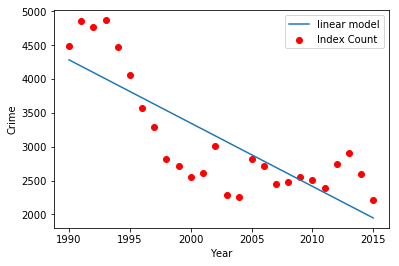

In [32]:
plt.show()

2 Autoregressive models

In [34]:
# how about using the level of crime last year? (called ``lagged outcome'')
X = pd.DataFrame(tompkins["Index Count"][:-1])
X["Ones"] = 1.
y = tompkins["Index Count"][1:]
w,resid,rank,s = np.linalg.lstsq(X,y)

tompkins["pred_ar1"] = np.nan
tompkins.loc[1:,"pred_ar1"] = np.matmul(X,w)

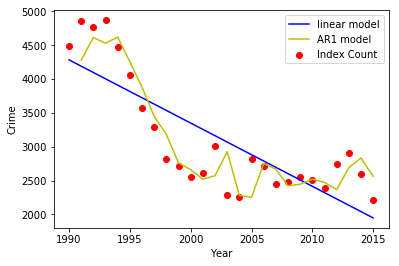

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tompkins.Year,tompkins["Index Count"],c="r",marker="o",label="Index Count")
ax.plot(tompkins.Year, tompkins["pred_linear"],c="b",linestyle="-",label="linear model")
ax.plot(tompkins.Year[1:], tompkins["pred_ar1"][1:],c="y",linestyle="-",label="AR1 model")
ax.set_xlabel("Year")
ax.set_ylabel("Crime")
ax.legend()
plt.show()

In [36]:
# how about using the year *and* the level of crime last year? (called ``lagged outcome'')


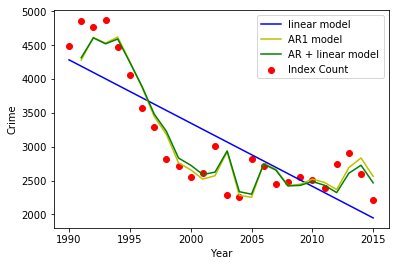

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tompkins.Year,tompkins["Index Count"],c="r",marker="o",label="Index Count")
ax.plot(tompkins.Year, tompkins["pred_linear"],c="b",linestyle="-",label="linear model")
ax.plot(tompkins.Year[1:], tompkins["pred_ar1"][1:],c="y",linestyle="-",label="AR1 model")
ax.plot(tompkins.Year[1:], tompkins["pred_ar1_lin"][1:], c="g",linestyle="-",label="AR + linear model")
ax.set_xlabel("Year")
ax.set_ylabel("Crime")
ax.legend()
plt.show()

Smoothed models

In [40]:
alpha = 1
n = len(tompkins.Year)
X = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        X[i,j] = exp(-(tompkins.Year[i]-tompkins.Year[j])**2)

y = tompkins["Index Count"]
w,resid,rank,s = np.linalg.lstsq(X,y)

tompkins["pred_smooth"] = np.matmul(X,w)

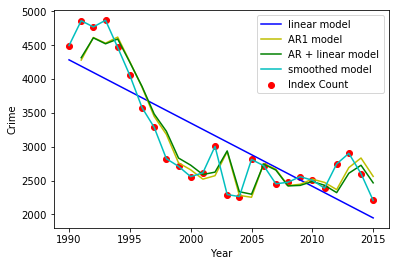

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tompkins.Year,tompkins["Index Count"],c="r",marker="o",label="Index Count")
ax.plot(tompkins.Year, tompkins["pred_linear"],c="b",linestyle="-",label="linear model")
ax.plot(tompkins.Year[1:], tompkins["pred_ar1"][1:],c="y",linestyle="-",label="AR1 model")
ax.plot(tompkins.Year[1:], tompkins["pred_ar1_lin"][1:], c="g",linestyle="-",label="AR + linear model")
ax.plot(tompkins.Year, tompkins["pred_smooth"], c="c",linestyle="-",label="smoothed model")
ax.set_xlabel("Year")
ax.set_ylabel("Crime")
ax.legend()
plt.show()

In [43]:
alpha = 1
n = len(tompkins.Year)
nknots = round(n/2)
X = np.zeros((n,nknots))
for i in range(n):
    for j in range(nknots):
        X[i,j] = exp(-(tompkins.Year[i]-tompkins.Year[2*j])**2)
X = np.append(X, np.ones((n,1)), 1)
y = tompkins["Index Count"]
w,resid,rank,s = np.linalg.lstsq(X,y)

tompkins["pred_smooth"] = np.matmul(X,w)

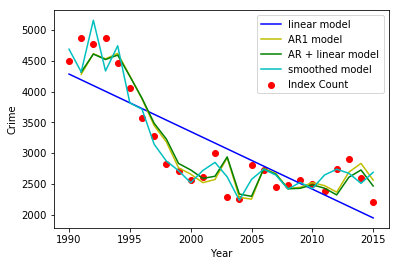

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tompkins.Year,tompkins["Index Count"],c="r",marker="o",label="Index Count")
ax.plot(tompkins.Year, tompkins["pred_linear"],c="b",linestyle="-",label="linear model")
ax.plot(tompkins.Year[1:], tompkins["pred_ar1"][1:],c="y",linestyle="-",label="AR1 model")
ax.plot(tompkins.Year[1:], tompkins["pred_ar1_lin"][1:], c="g",linestyle="-",label="AR + linear model")
ax.plot(tompkins.Year, tompkins["pred_smooth"], c="c",linestyle="-",label="smoothed model")
ax.set_xlabel("Year")
ax.set_ylabel("Crime")
ax.legend()
plt.show()

regularize + smooth

In [46]:
alpha = 1
n = len(tompkins.Year)
X = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        X[i,j] = exp(-(tompkins.Year[i]-tompkins.Year[j])**2)

y = tompkins["Index Count"] - tompkins["pred_linear"]
temp = np.linalg.lstsq(np.matmul(X.T,X)+np.eye(n),X.T)
w = np.matmul(temp[0],y)

tompkins["pred_smooth_reg"] = np.matmul(X,w) + tompkins["pred_linear"]

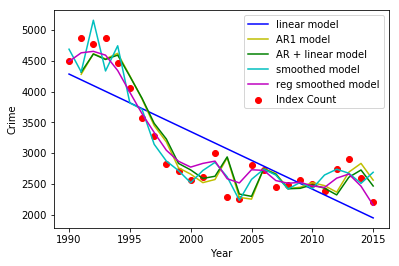

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tompkins.Year,tompkins["Index Count"],c="r",marker="o",label="Index Count")
ax.plot(tompkins.Year, tompkins["pred_linear"],c="b",linestyle="-",label="linear model")
ax.plot(tompkins.Year[1:], tompkins["pred_ar1"][1:],c="y",linestyle="-",label="AR1 model")
ax.plot(tompkins.Year[1:], tompkins["pred_ar1_lin"][1:], c="g",linestyle="-",label="AR + linear model")
ax.plot(tompkins.Year, tompkins["pred_smooth"], c="c",linestyle="-",label="smoothed model")
ax.plot(tompkins.Year, tompkins["pred_smooth_reg"], c="m",linestyle="-",label="reg smoothed model")
ax.set_xlabel("Year")
ax.set_ylabel("Crime")
ax.legend()
plt.show()